## RNN Regression Test



In [162]:
import torch
import numpy as np
import pandas as pd
import torch.nn as torchNN
import matplotlib.pyplot as plt
from IPython import display
from torch.utils.data import DataLoader

%matplotlib inline

In [163]:
# regionData = torch.linspace(-5, 5, 10000)
# trainData = DataLoader(dataset = regionData, batch_size = 64, shuffle = True)

In [164]:
class Network(torchNN.Module):
    def __init__(self, hiddenNum: int) -> None:
        super(Network, self).__init__()

        self.rnn = torchNN.RNN(
            input_size = 1,
            hidden_size = hiddenNum,
            num_layers = 1,
            batch_first = True
        )

        self.outLayer = torchNN.Sequential(
            torchNN.Linear(
                in_features = hiddenNum,
                out_features = 32
            ),
            torchNN.LeakyReLU(),
            torchNN.Linear(
                in_features = 32,
                out_features = 1
            ),
        )
        
        self.hiddenNum = hiddenNum
    
    def forward(self, inputs, h):
        x, h = self.rnn(inputs, h)
        x = x.view(-1, self.hiddenNum)
        x = self.outLayer(x)
        return x.view(1, 10, 1), h


In [165]:
model = Network(32)
optimizer = torch.optim.ASGD(model.parameters(), lr = 0.03)
lossFunction = torchNN.MSELoss()
timeStep = 10
hiddenState = None

timeStep -> 类似于 " 序列 " 长度
主要是用于rnn循环次数

对于单层RNN来说, inputShape:(Batchsize, timeStep, embedding)
OutputShape:(batchSize, TimeStep, cellNumber)

In [166]:
fig = plt.figure()

for step in range(100):

    start, end = step * np.pi, (step + 1) * np.pi

    data = torch.linspace(start, end, timeStep, dtype=torch.float32)

    trainX = torch.sin(data)
    trainY = torch.cos(data)

    trainX = trainX.view(1, timeStep, 1)
    trainY = trainY.view(1, timeStep, 1)
    # (batchsize, timeStep, embedding)
    predictY, hiddenState = model(trainX, hiddenState)
    hiddenState = hiddenState.data
    assert(predictY.shape == trainY.shape)
    loss = lossFunction(predictY, trainY)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step + 1) % 5 == 0:
        plt.plot(data, predictY.view(-1).data.numpy(), color = 'blue')
        plt.plot(data, trainY.view(-1).data.numpy(), color = 'red')
        plt.pause(0.1)
        plt.show()
        display.clear_output(wait = True)
        print(loss.data)

tensor(0.0021)


In [167]:
predictOutputs = []
realCos = []
for step in range(10):
    start, end = step * np.pi, (step + 1) * np.pi

    data = torch.linspace(start, end, timeStep)

    trainX = torch.sin(data)
    trainY = torch.cos(data)

    trainX = trainX.view(1, timeStep, 1)
    trainY = trainY.view(1, timeStep, 1)
    # (batchsize, timeStep, embedding)
    predictY, hiddenState = model(trainX, hiddenState)
    predictOutputs += list(predictY.view(-1).data.numpy())
    realCos += list(trainY.view(-1).data.numpy())

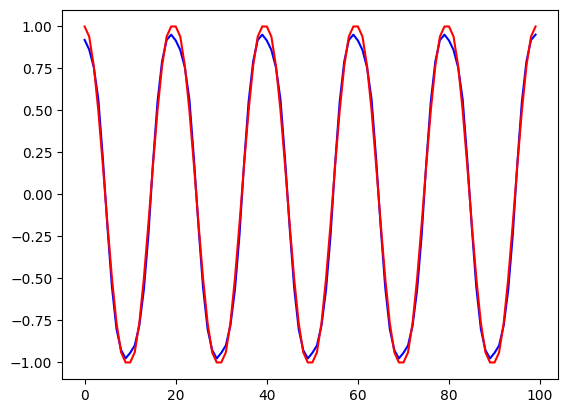

In [168]:
plt.plot(predictOutputs, color = 'blue')
plt.plot(realCos, color = 'red')